In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv("training_set.csv")

In [23]:
data

,Unnamed: 0,Time,P1,P2,P3,P4,P5,P6,P7,P8,...,P21,P22,P23,P24,P25,P26,P27,P28,Mud,Class
0,202709,134454.0,1.997387,0.028631,-1.885047,0.341234,0.350263,-0.900297,0.119352,-0.157746,...,0.229023,0.729647,-0.082236,-0.550494,0.227840,-0.090372,-0.012176,-0.044384,21.90,0
1,129171,78980.0,-0.851823,1.446070,0.679759,0.007973,0.617801,-1.210695,1.369637,-0.442985,...,0.130170,0.471780,-0.215118,0.402875,-0.109756,-0.629885,-0.725665,-0.351324,2.99,0
2,73775,55273.0,1.119963,0.546055,0.877856,2.415833,-0.282554,-0.336366,0.018747,0.042135,...,-0.183696,-0.662870,0.156578,0.471700,0.182968,-0.295540,-0.012185,0.020821,7.08,0
3,31569,36417.0,1.328189,-0.305950,-0.998639,-1.236795,1.733800,3.236893,-0.779472,0.830587,...,-0.183574,-0.678249,0.056192,1.054628,0.275940,0.919345,-0.069212,0.003619,7.68,0
4,250571,154977.0,-0.618361,-0.861401,0.513524,1.677866,-0.143396,-0.510276,-1.020312,0.734283,...,0.029121,-0.269169,0.410990,-0.091444,-0.883856,-0.863775,-0.023857,-0.293884,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,123779,77062.0,-3.335590,-2.599210,0.382040,1.960999,1.609231,-2.167901,-0.318535,0.267420,...,-0.066432,0.680808,2.984533,0.326445,0.607655,-0.206789,0.293206,-0.385501,45.06,0
227841,213565,139306.0,-2.547925,0.907351,0.118437,4.582570,0.763807,2.426485,0.467556,-1.477862,...,1.233590,0.892970,1.037710,-0.988463,-0.404744,0.604577,0.554823,-0.576428,150.96,0
227842,213130,139123.0,0.020578,-0.300600,0.515964,-2.423570,0.219863,0.176180,-0.108928,0.131816,...,0.542415,1.513675,0.025602,0.274267,-1.043304,-0.407177,0.254161,0.257661,29.00,0
227843,65898,51795.0,1.151628,-0.011729,1.192780,1.135587,-0.694287,0.325303,-0.637144,0.223683,...,-0.030267,0.138446,-0.056992,0.031559,0.454740,-0.407599,0.074367,0.024642,0.01,0


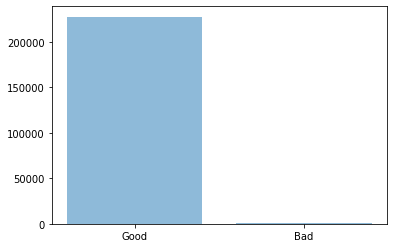

In [24]:
quality = ['Good','Bad']
plt.bar(quality, data.Class.value_counts(), align='center', alpha=0.5)

plt.show()

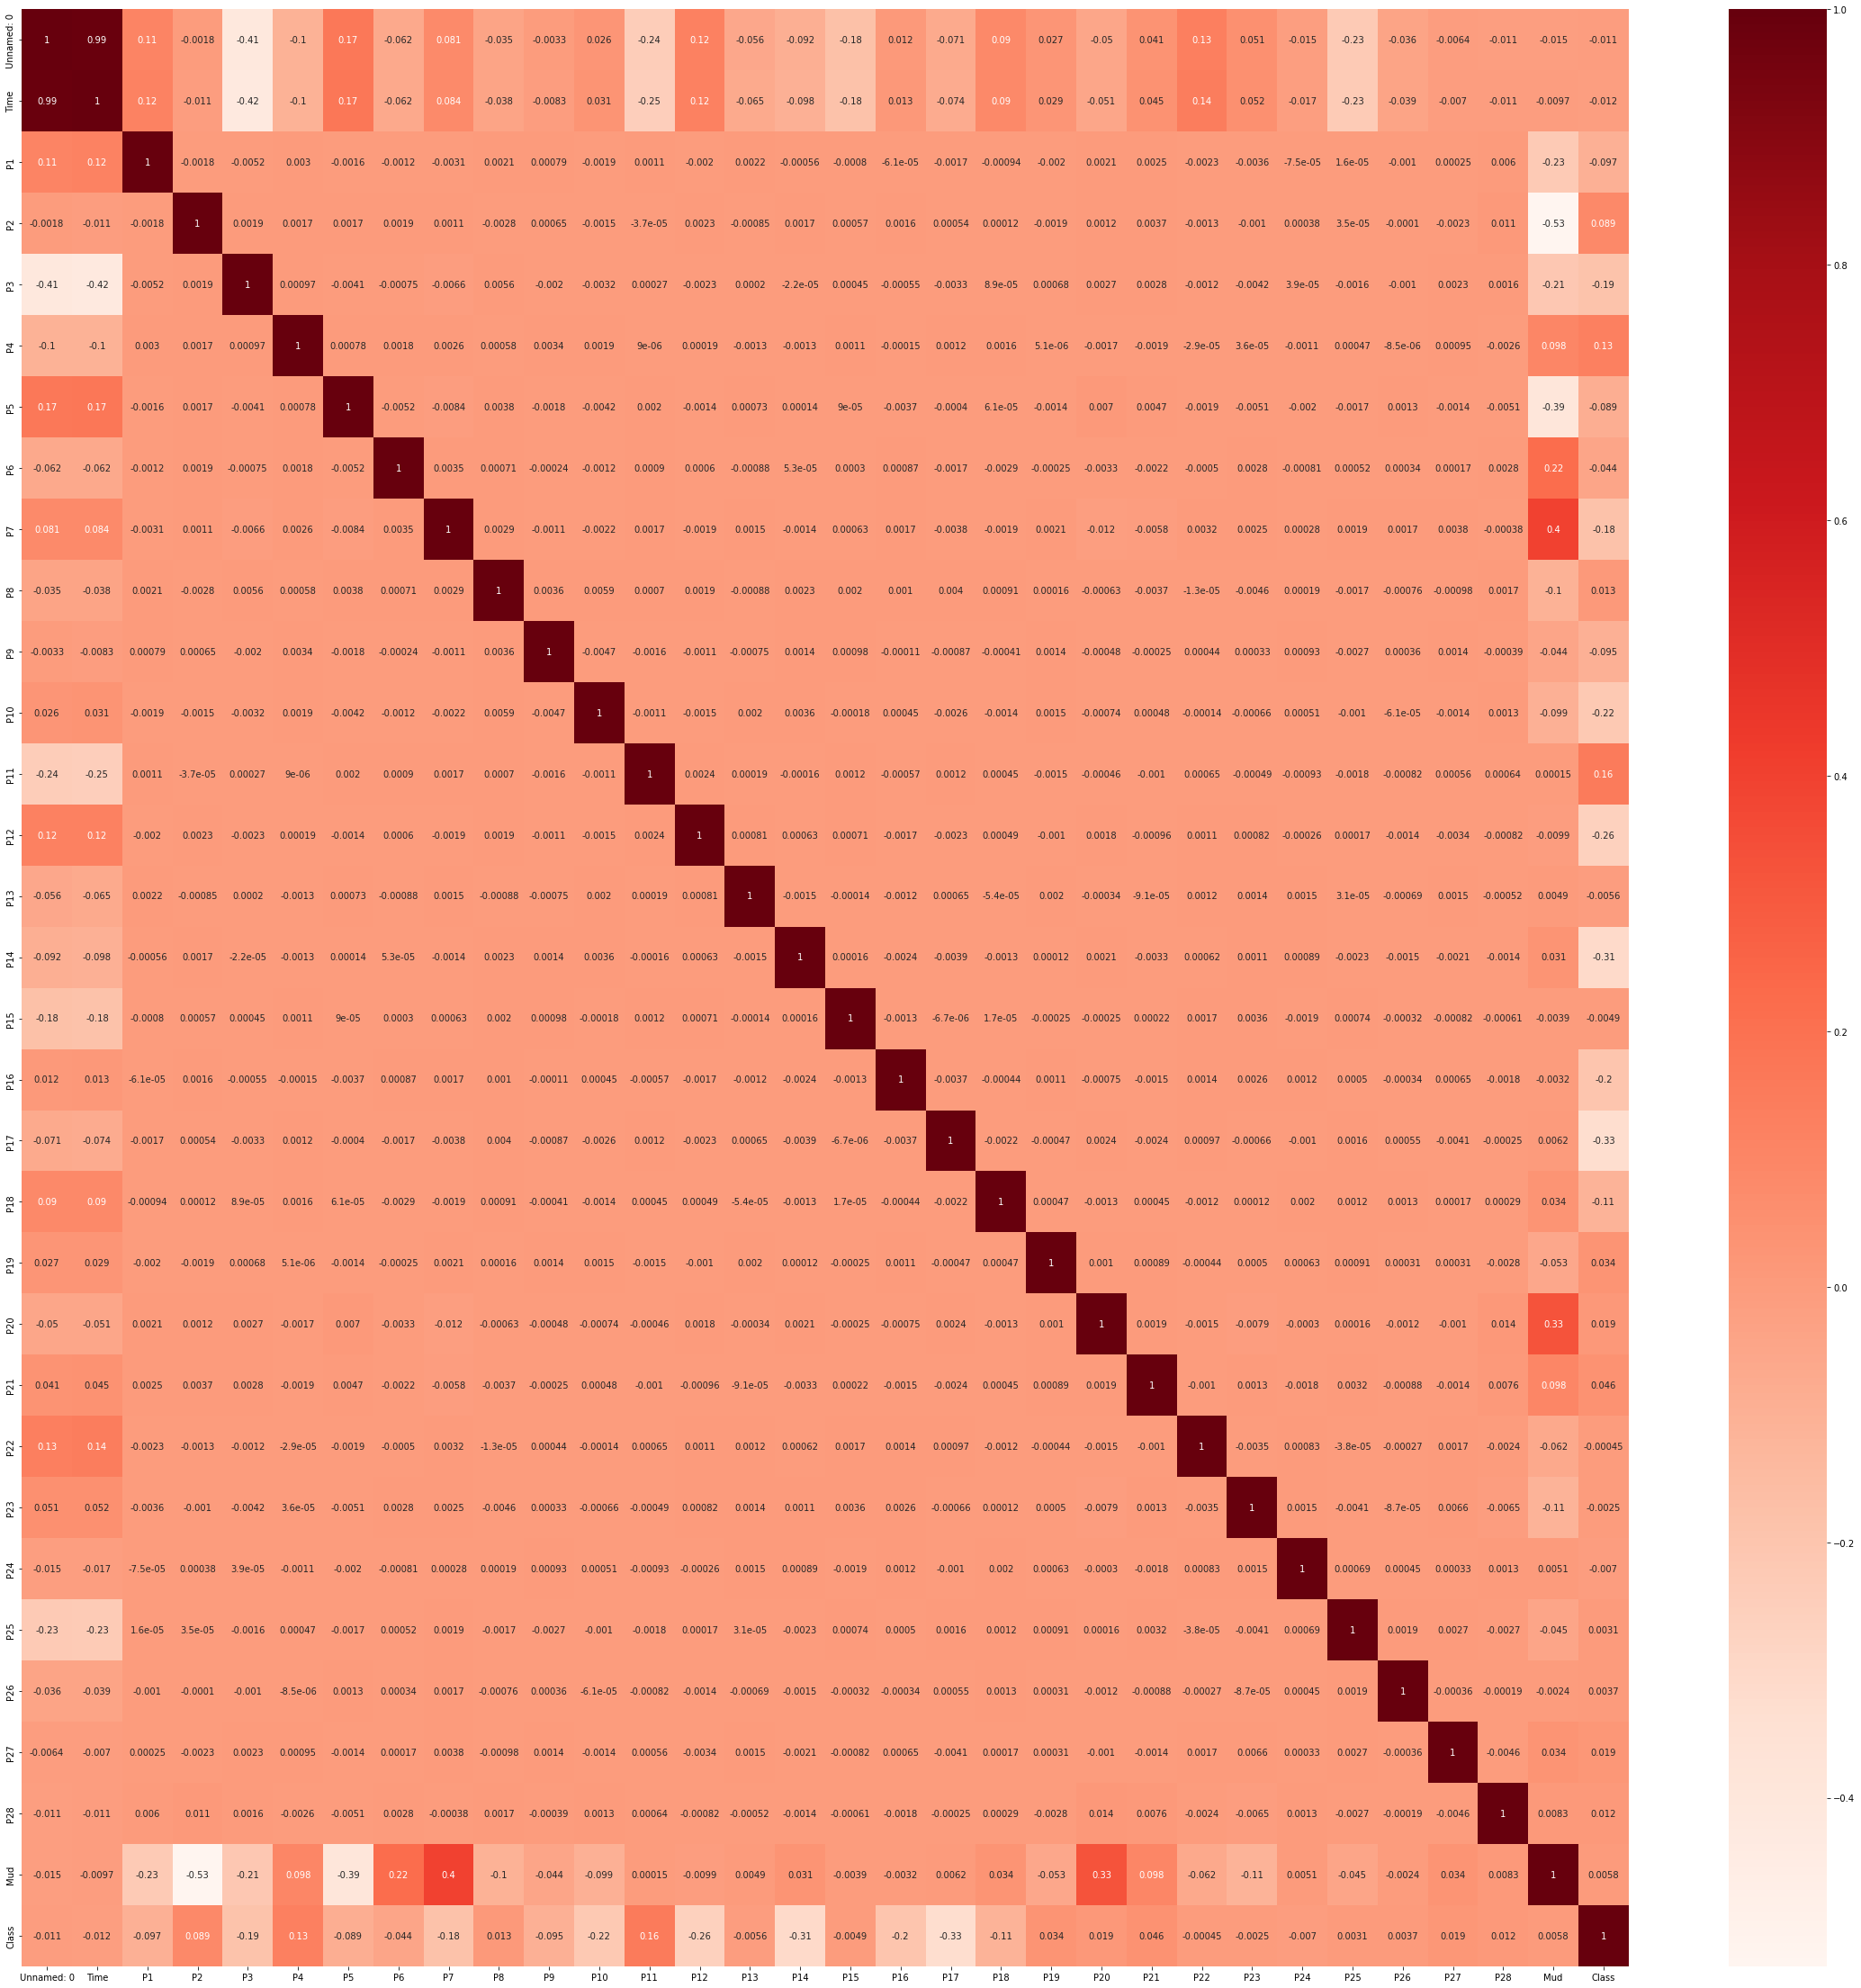

In [25]:
plt.figure(figsize=(40,40))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
y = data.pop('Class')

In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
227840    0
227841    0
227842    0
227843    0
227844    0
Name: Class, Length: 227845, dtype: int64

Data visualization by PCA - 

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
datapca = pca.fit_transform(data)
datapca

array([[-7.17390906e+04, -4.26455702e+03],
       [ 1.96693816e+04,  7.12375628e+03],
       [ 7.95062248e+04,  3.21663533e+01],
       ...,
       [-8.30999052e+04, -3.11189144e+03],
       [ 8.80680693e+04, -8.83469517e+02],
       [-1.29175485e+04,  5.96155272e+02]])

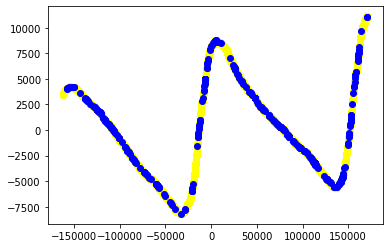

In [29]:
plt.scatter(datapca[:,0], datapca[:,1], c='yellow')
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(datapca[i,0], datapca[i,1], c='blue')

plt.show()

Training - 

In [30]:
# Common imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# For logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# For XGBoost
from xgboost import XGBClassifier

# For Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Catboost
import catboost as cb
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=42)


In [45]:
def confusion_matrix_visualization(pipe, y_test, predictions):
    cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    disp.plot()

Logistic regression - 

0.8459955932657309


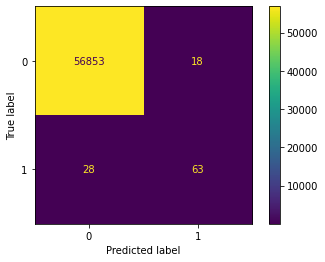

In [32]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression(max_iter=100000))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

confusion_matrix_visualization(pipe, y_test, predictions)
print(roc_auc_score(y_test, predictions))

XGboost - 

C:\Users\ayush\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.895542852814573


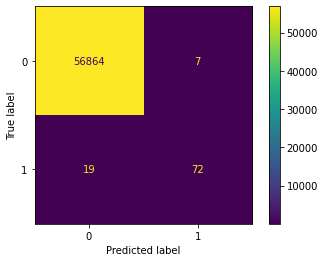

In [33]:
model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

confusion_matrix_visualization(model, y_test, predictions)
print(roc_auc_score(y_test,predictions))

Randomforest - 

0.895542852814573


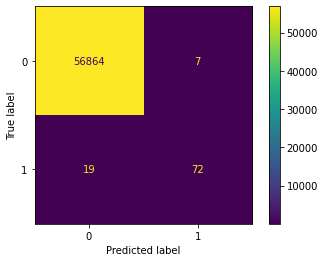

In [34]:
pipe = make_pipeline(RandomForestClassifier())
pipe.fit(X_train, y_train)

confusion_matrix_visualization(model, y_test, predictions)
print(roc_auc_score(y_test,model.predict(X_test)))

Catboost - 

0.9648976157917446


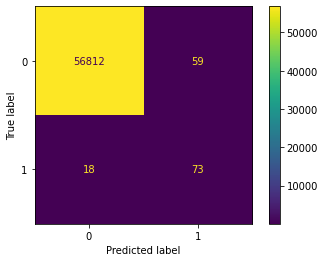

In [53]:
params = {
    'depth': 4,
    'learning_rate': 0.03158149143364172,
    'random_strength': 38,
    'bagging_temperature': 0.0322304245125658,
    'od_type': 'IncToDec'
}
clf = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', task_type="GPU", **params, verbose=False)
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
clf.fit(X_train_over, y_train_over)

predictions = np.round(abs(clf.predict_proba(X_test)[:,1]))
confusion_matrix_visualization(clf, y_test, predictions)
print(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1]))